# - Đánh giá df1 dựa trên các mô hình học máy:

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12051 entries, 0 to 12050
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       12051 non-null  object 
 1   Price          12051 non-null  int64  
 2   Type of House  12051 non-null  object 
 3   Land Area      12051 non-null  float64
 4   Bedrooms       12051 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 470.9+ KB
None

Mô tả dữ liệu:
                Price  Land Area  Bedrooms
count        12051.00   12051.00  12051.00
mean    6858116836.78      68.55      5.75
std     5245328714.46      38.60      8.05
min      520000000.00      10.00      1.00
25%     3390000000.00      42.00      3.00
50%     7500000000.00      64.00      4.00
75%     8000000000.00      73.00      4.00
max   220000000000.00     840.00     38.00

Kiểm tra giá trị thiếu:
Location         0
Price            0
Type of House    0
Land Area  

100%|██████████| 42/42 [00:57<00:00,  1.37s/it]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 8785, number of used features: 16
[LightGBM] [Info] Start training from score 22.317311
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

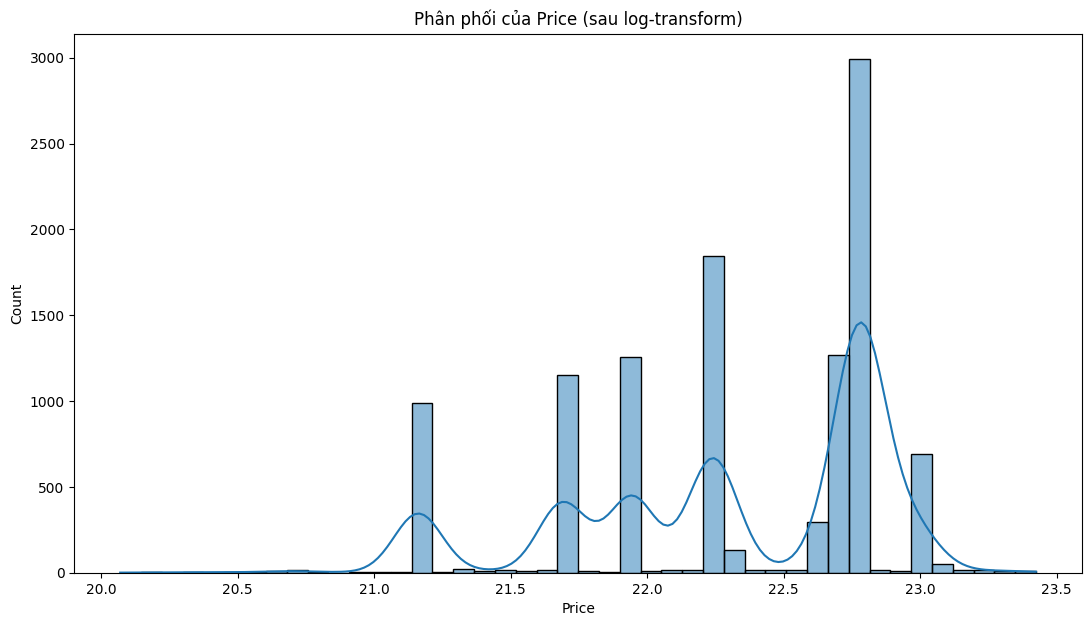

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyRegressor

# 1. Đọc và kiểm tra dữ liệu
df = pd.read_csv('df1.csv')

# In thông tin cơ bản về dữ liệu
print("Thông tin dữ liệu:")
print(df.info())
print("\nMô tả dữ liệu:")
print(df.describe())
print("\nKiểm tra giá trị thiếu:")
print(df.isnull().sum())

# 2. Xử lý giá trị thiếu
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# 3. Xử lý ngoại lai (Outliers) cho Price
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR)))]

# 4. Chuyển đổi biến mục tiêu (Price) sang log scale
df['Price'] = np.log1p(df['Price'])  # log(1 + x) để tránh log(0)

# 5. Xử lý biến dạng chuỗi: Location, Type of House
df = pd.get_dummies(df, columns=['Location', 'Type of House'], drop_first=True)

# 6. Xác định đặc trưng và biến mục tiêu
X = df.drop('Price', axis=1)
y = df['Price']

# 7. Chuẩn hóa đặc trưng (Feature Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Chia dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 9. Sử dụng LazyPredict để so sánh các mô hình
print("\nĐánh giá các mô hình bằng LazyPredict:")
lazy_reg = LazyRegressor(verbose=-1, ignore_warnings=False, custom_metric=None)
models, predictions = lazy_reg.fit(X_train, X_test, y_train, y_test)

# In bảng kết quả so sánh các mô hình
print("\nKết quả so sánh các mô hình:")
print(models)

# 10. Vẽ biểu đồ phân phối Price và tương quan (tùy chọn)
plt.figure(figsize=(13, 7))
sns.histplot(df['Price'], kde=True)
plt.title('Phân phối của Price (sau log-transform)')
plt.show()

# - Đánh giá df2 dựa trên các mô hình học máy:

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       14271 non-null  object 
 1   Price          14271 non-null  int64  
 2   Type of House  14271 non-null  object 
 3   Land Area      14271 non-null  float64
 4   Bedrooms       14271 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 557.6+ KB
None

Mô tả dữ liệu:
                Price  Land Area  Bedrooms
count        14271.00   14271.00  14271.00
mean    8435917314.83      68.95      6.56
std     6975859707.91      35.74      7.75
min      520000000.00       6.00      0.00
25%     4104999999.50      42.00      3.00
50%     7500000000.00      68.00      4.00
75%     8000000000.00      73.00      6.00
max   220000000000.00     840.00     40.00

Kiểm tra giá trị thiếu:
Location         0
Price            0
Type of House    0
Land Area  

100%|██████████| 42/42 [01:29<00:00,  2.13s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 9529, number of used features: 17
[LightGBM] [Info] Start training from score 22.351078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

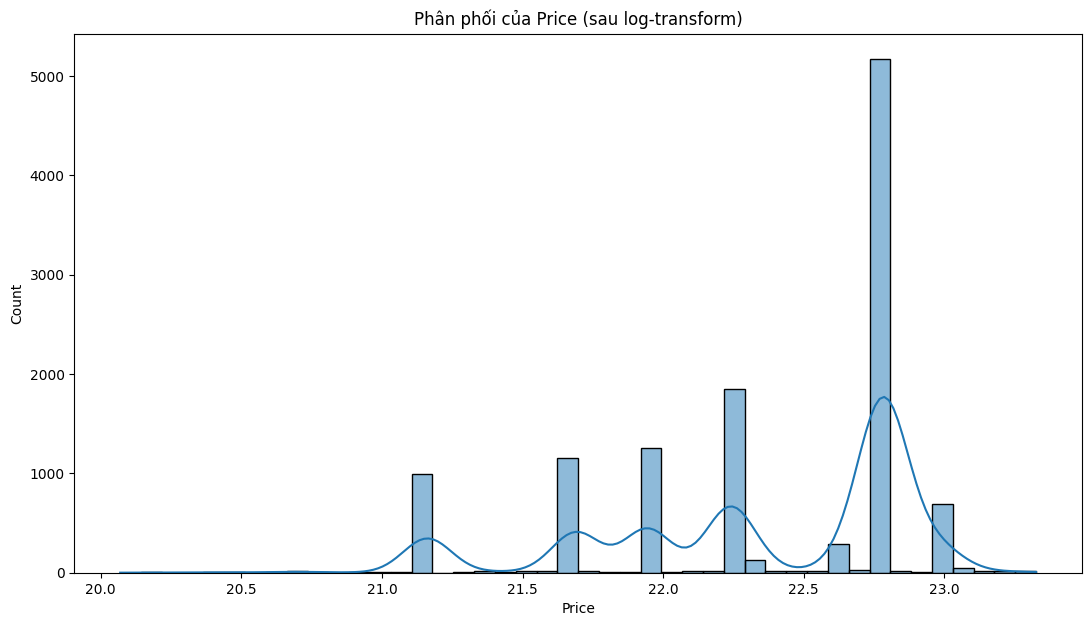

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyRegressor

# 1. Đọc và kiểm tra dữ liệu
df = pd.read_csv('df2.csv')

# In thông tin cơ bản về dữ liệu
print("Thông tin dữ liệu:")
print(df.info())
print("\nMô tả dữ liệu:")
print(df.describe())
print("\nKiểm tra giá trị thiếu:")
print(df.isnull().sum())

# 2. Xử lý giá trị thiếu
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# 3. Xử lý ngoại lai (Outliers) cho Price
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR)))]

# 4. Chuyển đổi biến mục tiêu (Price) sang log scale
df['Price'] = np.log1p(df['Price'])  # log(1 + x) để tránh log(0)

# 5. Xử lý biến dạng chuỗi: Location, Type of House
df = pd.get_dummies(df, columns=['Location', 'Type of House'], drop_first=True)

# 6. Xác định đặc trưng và biến mục tiêu
X = df.drop('Price', axis=1)
y = df['Price']

# 7. Chuẩn hóa đặc trưng (Feature Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Chia dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 9. Sử dụng LazyPredict để so sánh các mô hình
print("\nĐánh giá các mô hình bằng LazyPredict:")
lazy_reg = LazyRegressor(verbose=-1, ignore_warnings=False, custom_metric=None)
models, predictions = lazy_reg.fit(X_train, X_test, y_train, y_test)

# In bảng kết quả so sánh các mô hình
print("\nKết quả so sánh các mô hình:")
print(models)

# 10. Vẽ biểu đồ phân phối Price và tương quan (tùy chọn)
plt.figure(figsize=(13, 7))
sns.histplot(df['Price'], kde=True)
plt.title('Phân phối của Price (sau log-transform)')
plt.show()

# - Đánh giá df2 dựa trên model Ridge Regression:

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14271 entries, 0 to 14270
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       14271 non-null  object 
 1   Price          14271 non-null  int64  
 2   Type of House  14271 non-null  object 
 3   Land Area      14271 non-null  float64
 4   Bedrooms       14271 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 557.6+ KB
None

Mô tả dữ liệu:
                Price  Land Area  Bedrooms
count        14271.00   14271.00  14271.00
mean    8435917314.83      68.95      6.56
std     6975859707.91      35.74      7.75
min      520000000.00       6.00      0.00
25%     4104999999.50      42.00      3.00
50%     7500000000.00      68.00      4.00
75%     8000000000.00      73.00      6.00
max   220000000000.00     840.00     40.00

Kiểm tra giá trị thiếu:
Location         0
Price            0
Type of House    0
Land Area  

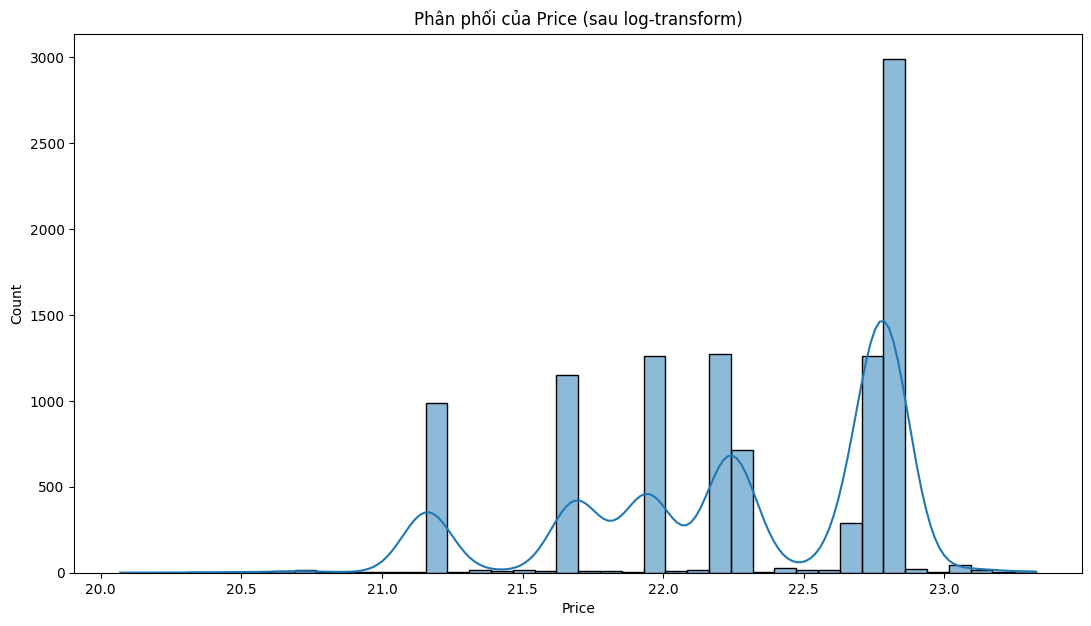

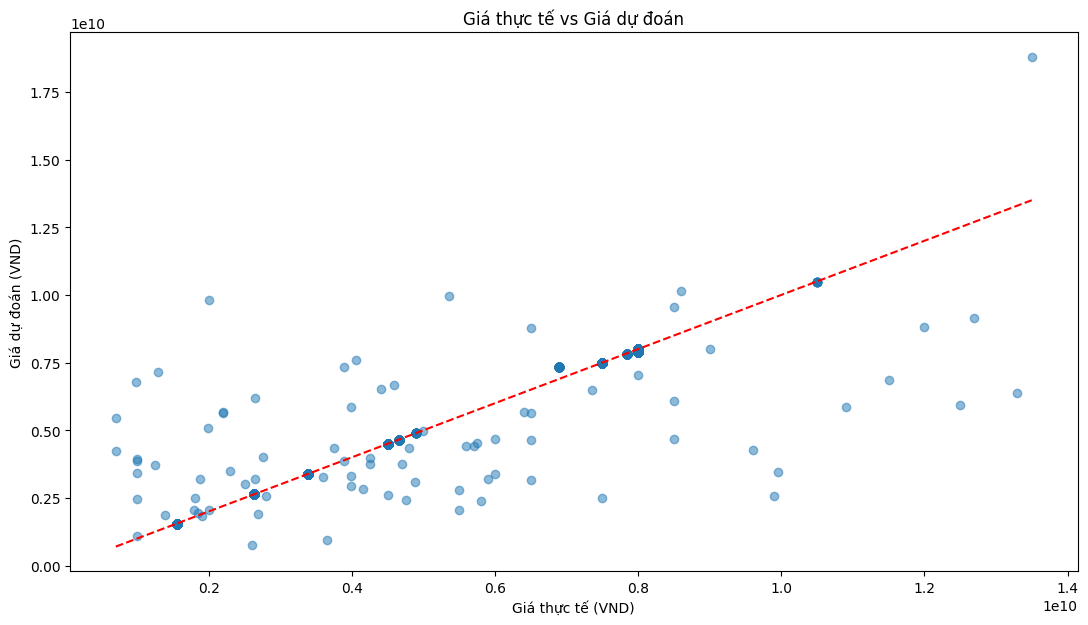

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Định nghĩa lớp CustomRidge
class CustomRidge:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        n_features = X_with_bias.shape[1]
        I = np.identity(n_features)
        I[0, 0] = 0
        XTX = X_with_bias.T @ X_with_bias
        XTX_reg = XTX + self.alpha * I
        XTy = X_with_bias.T @ y
        self.weights = np.linalg.solve(XTX_reg, XTy)
        self.bias = self.weights[0]
        self.weights = self.weights[1:]

    def predict(self, X):
        return X @ self.weights + self.bias

# 1. Đọc và kiểm tra dữ liệu
df = pd.read_csv('df2.csv')

# In thông tin cơ bản về dữ liệu
print("Thông tin dữ liệu:")
print(df.info())
print("\nMô tả dữ liệu:")
print(df.describe())
print("\nKiểm tra giá trị thiếu:")
print(df.isnull().sum())

# 2. Xử lý giá trị thiếu
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# 3. Xử lý ngoại lai và giới hạn giá trị bất thường
for col in ['Price', 'Bedrooms', 'Land Area']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
# Giới hạn Bedrooms <= 10 và Land Area <= 200
df = df[df['Bedrooms'] <= 10]
df = df[df['Land Area'] <= 200]
print(f"Số mẫu sau khi xử lý ngoại lai và giới hạn: {len(df)}")

# 4. Chuyển đổi biến mục tiêu (Price) sang log scale
df['Price'] = np.log1p(df['Price'])

# 5. Xử lý biến dạng chuỗi: Location, Type of House
df = pd.get_dummies(df, columns=['Location', 'Type of House'], drop_first=True)

# 6. Xác định đặc trưng và biến mục tiêu
X = df.drop('Price', axis=1).to_numpy()
y = df['Price'].to_numpy()

# 7. Chuẩn hóa đặc trưng
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Số đặc trưng sau mã hóa one-hot: {X_scaled.shape[1]}")

# 8. Chia dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 9. Tinh chỉnh alpha trên tập validation
print("\nTinh chỉnh alpha trên tập validation:")
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
best_alpha = 1.0
best_r2 = -float('inf')
for alpha in [0.1, 1.0, 10.0]:
    ridge = CustomRidge(alpha=alpha)
    ridge.fit(X_train_sub, y_train_sub)
    y_pred_val = ridge.predict(X_val)
    r2_val = r2_score(y_val, y_pred_val)
    print(f"alpha={alpha}, R² trên validation={r2_val:.4f}")
    if r2_val > best_r2:
        best_r2 = r2_val
        best_alpha = alpha
print(f"alpha tối ưu: {best_alpha}")

# 10. Huấn luyện và đánh giá mô hình cuối cùng
print("\nĐánh giá mô hình Ridge Regression tự xây dựng:")
ridge_custom = CustomRidge(alpha=best_alpha)
ridge_custom.fit(X_train, y_train)
y_pred_custom = ridge_custom.predict(X_test)

# Kiểm tra overfitting
y_pred_train = ridge_custom.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"R² trên tập train: {r2_train:.4f}")

# Tính toán các chỉ số đánh giá trên giá trị log-transformed
mae_custom = mean_absolute_error(y_test, y_pred_custom)
rmse_custom = np.sqrt(mean_squared_error(y_test, y_pred_custom))
r2_custom = r2_score(y_test, y_pred_custom)

print(f"Mean Absolute Error (MAE): {mae_custom:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom:.4f}")
print(f"R² Score trên tập test: {r2_custom:.4f}")

# 11. Chuyển đổi ngược log để tính toán giá trị thực
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred_custom)

mae_real = mean_absolute_error(y_test_real, y_pred_real)
rmse_real = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
r2_real = r2_score(y_test_real, y_pred_real)

print("\nKết quả trên giá trị gốc (không log):")
print(f"Mean Absolute Error (MAE): {mae_real:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_real:.2f}")
print(f"R² Score: {r2_real:.4f}")

# 12. Vẽ biểu đồ phân phối Price và giá thực tế vs dự đoán
plt.figure(figsize=(13, 7))
sns.histplot(df['Price'], kde=True)
plt.title('Phân phối của Price (sau log-transform)')
plt.show()
# plt.savefig('price_distribution.png')
plt.close()

plt.figure(figsize=(13, 7))
plt.scatter(y_test_real, y_pred_real, alpha=0.5)
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--')
plt.xlabel('Giá thực tế (VND)')
plt.ylabel('Giá dự đoán (VND)')
plt.title('Giá thực tế vs Giá dự đoán')
plt.show()
# plt.savefig('prediction_scatter.png')
plt.close()

# - Đánh giá df1 dựa trên model Ridge Regression:

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12051 entries, 0 to 12050
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       12051 non-null  object 
 1   Price          12051 non-null  int64  
 2   Type of House  12051 non-null  object 
 3   Land Area      12051 non-null  float64
 4   Bedrooms       12051 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 470.9+ KB
None

Mô tả dữ liệu:
                Price  Land Area  Bedrooms
count        12051.00   12051.00  12051.00
mean    6858116836.78      68.55      5.75
std     5245328714.46      38.60      8.05
min      520000000.00      10.00      1.00
25%     3390000000.00      42.00      3.00
50%     7500000000.00      64.00      4.00
75%     8000000000.00      73.00      4.00
max   220000000000.00     840.00     38.00

Kiểm tra giá trị thiếu:
Location         0
Price            0
Type of House    0
Land Area  

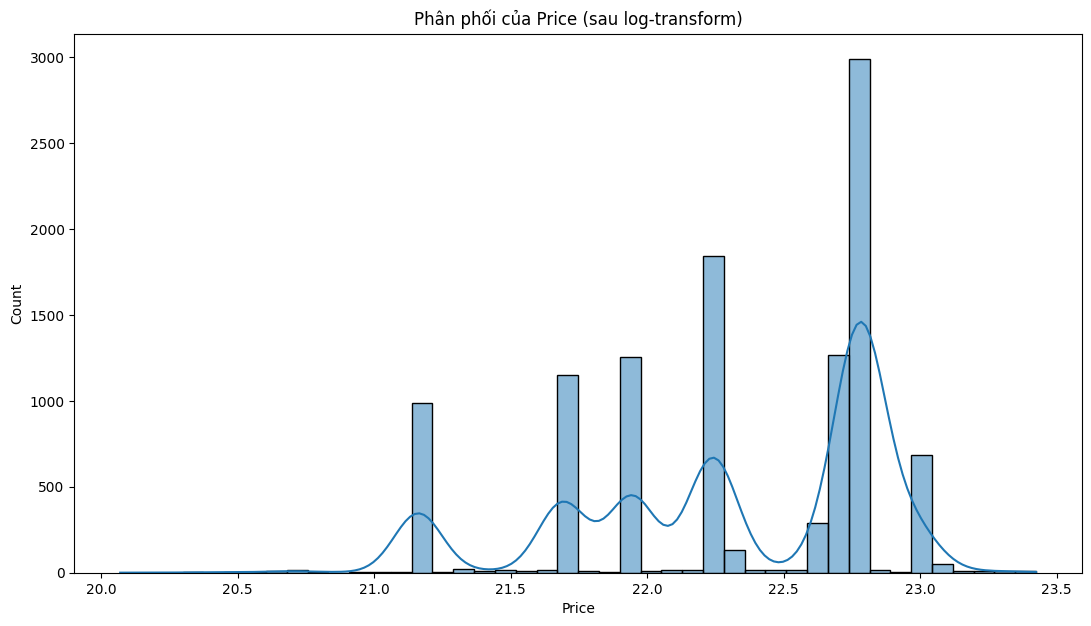

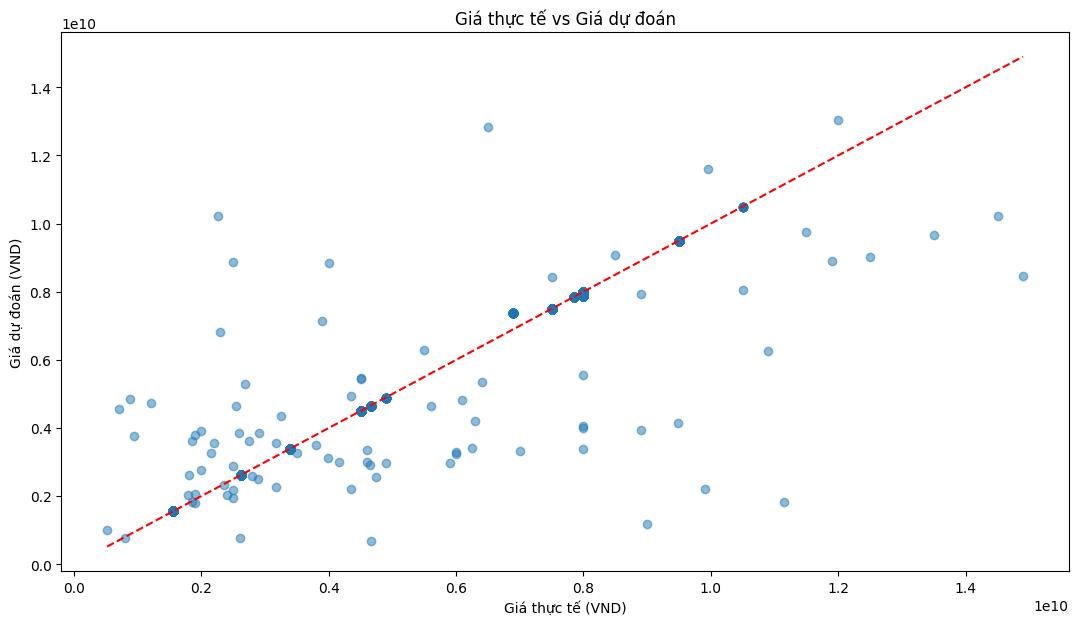

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Định nghĩa lớp CustomRidge
class CustomRidge:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        n_features = X_with_bias.shape[1]
        I = np.identity(n_features)
        I[0, 0] = 0
        XTX = X_with_bias.T @ X_with_bias
        XTX_reg = XTX + self.alpha * I
        XTy = X_with_bias.T @ y
        self.weights = np.linalg.solve(XTX_reg, XTy)
        self.bias = self.weights[0]
        self.weights = self.weights[1:]

    def predict(self, X):
        return X @ self.weights + self.bias

# 1. Đọc và kiểm tra dữ liệu
df = pd.read_csv('df1.csv')

# In thông tin cơ bản về dữ liệu
print("Thông tin dữ liệu:")
print(df.info())
print("\nMô tả dữ liệu:")
print(df.describe())
print("\nKiểm tra giá trị thiếu:")
print(df.isnull().sum())

# 2. Xử lý giá trị thiếu
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# 3. Xử lý ngoại lai và giới hạn giá trị bất thường
for col in ['Price', 'Bedrooms', 'Land Area']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
# Giới hạn Bedrooms <= 10 và Land Area <= 200
df = df[df['Bedrooms'] <= 10]
df = df[df['Land Area'] <= 200]
print(f"Số mẫu sau khi xử lý ngoại lai và giới hạn: {len(df)}")

# 4. Chuyển đổi biến mục tiêu (Price) sang log scale
df['Price'] = np.log1p(df['Price'])

# 5. Xử lý biến dạng chuỗi: Location, Type of House
df = pd.get_dummies(df, columns=['Location', 'Type of House'], drop_first=True)

# 6. Xác định đặc trưng và biến mục tiêu
X = df.drop('Price', axis=1).to_numpy()
y = df['Price'].to_numpy()

# 7. Chuẩn hóa đặc trưng
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Số đặc trưng sau mã hóa one-hot: {X_scaled.shape[1]}")

# 8. Chia dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 9. Tinh chỉnh alpha trên tập validation
print("\nTinh chỉnh alpha trên tập validation:")
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
best_alpha = 1.0
best_r2 = -float('inf')
for alpha in [0.1, 1.0, 10.0]:
    ridge = CustomRidge(alpha=alpha)
    ridge.fit(X_train_sub, y_train_sub)
    y_pred_val = ridge.predict(X_val)
    r2_val = r2_score(y_val, y_pred_val)
    print(f"alpha={alpha}, R² trên validation={r2_val:.4f}")
    if r2_val > best_r2:
        best_r2 = r2_val
        best_alpha = alpha
print(f"alpha tối ưu: {best_alpha}")

# 10. Huấn luyện và đánh giá mô hình cuối cùng
print("\nĐánh giá mô hình Ridge Regression tự xây dựng:")
ridge_custom = CustomRidge(alpha=best_alpha)
ridge_custom.fit(X_train, y_train)
y_pred_custom = ridge_custom.predict(X_test)

# Kiểm tra overfitting
y_pred_train = ridge_custom.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"R² trên tập train: {r2_train:.4f}")

# Tính toán các chỉ số đánh giá trên giá trị log-transformed
mae_custom = mean_absolute_error(y_test, y_pred_custom)
rmse_custom = np.sqrt(mean_squared_error(y_test, y_pred_custom))
r2_custom = r2_score(y_test, y_pred_custom)

print(f"Mean Absolute Error (MAE): {mae_custom:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom:.4f}")
print(f"R² Score trên tập test: {r2_custom:.4f}")

# 11. Chuyển đổi ngược log để tính toán giá trị thực
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred_custom)

mae_real = mean_absolute_error(y_test_real, y_pred_real)
rmse_real = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
r2_real = r2_score(y_test_real, y_pred_real)

print("\nKết quả trên giá trị gốc (không log):")
print(f"Mean Absolute Error (MAE): {mae_real:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_real:.2f}")
print(f"R² Score: {r2_real:.4f}")

# 12. Vẽ biểu đồ phân phối Price và giá thực tế vs dự đoán
plt.figure(figsize=(13, 7))
sns.histplot(df['Price'], kde=True)
plt.title('Phân phối của Price (sau log-transform)')
plt.show()
# plt.savefig('price_distribution.png')
plt.close()

plt.figure(figsize=(13, 7))
plt.scatter(y_test_real, y_pred_real, alpha=0.5)
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--')
plt.xlabel('Giá thực tế (VND)')
plt.ylabel('Giá dự đoán (VND)')
plt.title('Giá thực tế vs Giá dự đoán')
plt.show()
# plt.savefig('prediction_scatter.png')
plt.close()